# LIBRARIES

In [1]:
import time
import warnings
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
driver=webdriver.Chrome(ChromeDriverManager().install())#install webdriver



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\shrey\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\Users\shrey\AppData\Local\Temp/ipykernel_25516/667484331.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(ChromeDriverManager().install())#install webdriver


# LOGIN

In [3]:
def login(username,password):
    warnings.filterwarnings('ignore')
    driver.get('https://www.instagram.com')#open instagram
    time.sleep(5)#wait for page to load
    user=driver.find_element_by_name('username')#find username element
    user.send_keys(username)#enter username
    pwd=driver.find_element_by_name('password')#find password element
    pwd.send_keys(password)#enter password
    driver.find_element_by_tag_name('button').submit()#submit credentials
    wait=WebDriverWait(driver,7)#wait for submission
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="cmbtv"]/button'))).click()
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'HoLwm'))).click()#dismiss popups

 # SEARCHING A KEYWORD

In [4]:
def search(query):
    wait=WebDriverWait(driver,30)
    btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#find search bar element
    btn.send_keys(query)#enter handle name
    time.sleep(5)#wait for page to load matches
    c=1
    while(1):
        try:       
            path='//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div['+str(c)+']/a/div'#select each of the matches one by one
            name=driver.find_element_by_xpath(path)
            if(name.text.split()[0]==query):
                c+=1
                continue
            print(name.text.split()[0])#print handles
            c+=1
        except NoSuchElementException:#to check if list of matches has been exhausted
            break
    driver.find_element_by_class_name('coreSpriteSearchClear').click()#manually close search bar

# SEARCHING AND OPENING PROFILE

In [5]:
def openProf(profile_name):
    wait=WebDriverWait(driver,30)
    btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
    btn.send_keys(profile_name)#search handle
    wait=WebDriverWait(driver,30)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3'))).click()#select first search match

# FOLLOW

In [6]:
def follow():
    btn=driver.find_element_by_class_name('yZn4P')
    if(btn.text==''):#check if button text has any value or not
        print('Already following')
    else:
        btn.click()
        print('Followed')

# UNFOLLOW

In [7]:
def unfollow():
    btn=driver.find_element_by_class_name('yZn4P')
    if(btn.text=='Follow'):#check if button text has any value or not
        print('Already unfollowed')
    else:
        btn.click()
        driver.find_element_by_class_name('-Cab_').click()#confirm unfollow
        print('Unfollowed')

#  LIKE POSTS

In [8]:
def like(num):
    wait=WebDriverWait(driver,30)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
    c=0
    while(c<=num):
        try:
            btn=wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'fr66n')))
            html=btn.get_attribute('innerHTML')
            data=BeautifulSoup(html)
            if(data.svg.attrs['aria-label']=='Unlike'):#if 'Unlike' then it is already liked and vice versa
                print('Already Liked Post',c)
            else:
                btn.click()
            c+=1
            wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"l8mY4")]/button'))).click()#scroll to next post without exiting
            #time.sleep(5)
        except NoSuchElementException:
            break
    wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup
    print(str(c)+" posts liked")

# UNLIKE POSTS

In [9]:
def unlike(num):
    wait=WebDriverWait(driver,30)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
    c=0
    time.sleep(5)
    while(c<=num):
        try:
            btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'fr66n')))#extract like button
            html=btn.get_attribute('innerHTML')
            data=BeautifulSoup(html)
            if(data.svg.attrs['aria-label']=='Like'):#if 'like' then it is already Unliked and vice versa
                print('Already Unliked Post',c)
            else:
                btn.click()
            c+=1
            wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"l8mY4")]/button'))).click()#scroll to next post without exiting
            #time.sleep(5)
        except NoSuchElementException:
            break
    wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup
    print(str(c)+" posts unliked")

#  EXTRACTING LIST OF FOLLOWERS

## User Specified Instagram Handle

In [10]:
def followers(handle,n):
    handle_followers=[]
    wait=WebDriverWait(driver,30)
    btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#search bar
    btn.send_keys(handle)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3'))).click()#submit search
    btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')))
    no_followers=float(btn.get_attribute('title').replace(',',''))#extract number of followers
    wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div'))).click()#click on followers tab
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[2]')))
    scrollable_popup = driver.find_element(By.XPATH, '/html/body/div[6]/div/div/div/div[2]')
    c=0
    time.sleep(7)
    while(c<=n and c<=no_followers):
        try:
            follower=wait.until(EC.visibility_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[2]/ul/div/li['+str(c)+']')))#scrape follower
            text=follower.text.split()[0]
            handle_followers.append(text)
            print(follower.text.split()[0],c)
            c+=1
            driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_popup)
            #time.sleep(7)
        except:
            continue    
    wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"WaOAr")]/div/button'))).click()#close post popup
    return handle_followers

## Own Followers and Following

In [11]:
def own(handle_followers,n):
    followers=[]
    following=[]
    wait=WebDriverWait(driver,30)
    driver.find_element_by_xpath('//div[@class="J5g42"]/div[6]/span').click()
    driver.find_element_by_xpath('//div[@class="_01UL2"]/a').click()
    btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')))
    no_followers=float(btn.get_attribute('title').replace(',',''))#extract number of followers
    wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div'))).click()#click on followers tab
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[2]')))
    scrollable_popup = driver.find_element(By.XPATH, '/html/body/div[6]/div/div/div/div[2]')
    c=0
    while(c<=n and c<=no_followers):
        try:
            follower=wait.until(EC.visibility_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[2]/ul/div/li['+str(c)+']')))
            text=follower.text.split()[0]
            followers.append(text)
            print(follower.text.split()[0],c)
            c+=1
            driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_popup)
            time.sleep(2)
        except:
            pass
    wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"WaOAr")]/div/button'))).click()#close post popup
    btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[3]/a/div/span')))
    no_followers=float(btn.get_attribute('title').replace(',',''))#extract number of following
    wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[3]/a/div'))).click()
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[3]')))
    scrollable_popup = driver.find_element(By.XPATH, '/html/body/div[6]/div/div/div/div[3]')
    c=1
    while(c<=n and c<=no_followers):
        try:
            follower=wait.until(EC.visibility_of_element_located((By.XPATH,'/html/body/div[6]/div/div/div/div[3]/ul/div/li['+str(c)+']')))
            text=follower.text.split()[0]
            following.append(text)
            print(follower.text.split()[0],c)
            c+=1
            driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_popup)
            time.sleep(2)
        except:
            pass
    wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"WaOAr")]/div/button'))).click()#close post popup
    non_friends=list(set(following)-set(followers))
    handle_followers_non_friends=list(set(foodtalk)&set(non_friends))
    if(len(handle_followers_non_friends)==0):
        print('No Intersection Found')
    else:
        print(handle_followers_non_friends)

# CHECKING STORIES

In [12]:
def story():
    wait=WebDriverWait(driver,30)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'RR-M-')))#load story element
    story=driver.find_element_by_class_name('RR-M-')#locate story element
    if_seen=wait.until(EC.presence_of_element_located((By.TAG_NAME,'canvas')))#load and select story circle
    if(story.get_attribute('aria-disabled')=='true'):#if attribute value is true then story doesn't exist
        print('No Story Available')
    elif(if_seen.get_attribute('height')=='208'):#height and width is 208px 
            print('Already Viewed')#for viewed story for coding ninjas may vary for other handles                      
    else:
        story.click()

# COMMENT

In [13]:
def comment(n):
    wait=WebDriverWait(driver,30)
    driver.refresh()
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
    wait.until(EC.presence_of_element_located((By.XPATH,'//section[contains(@class,"sH9wk")]/div/form/textarea'))).click()
    wait.until(EC.presence_of_element_located((By.TAG_NAME,'textarea'))).clear()
    wait.until(EC.presence_of_element_located((By.TAG_NAME,'textarea'))).send_keys(n)
    driver.find_element_by_xpath('//section[contains(@class,"sH9wk")]/div/form/button').click()
    time.sleep(7)
    wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup

# BLOGGER HABIT ANALYSIS

## Pie Chart Based On Number Of Posts In Last 3 Days Of Top 5 Handles( Most Followers) For A Particular Search Query

In [14]:
#scrape names of top 10 query results
def most_popular1(query):
    wait=WebDriverWait(driver,30)
    btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#find search bar element
    btn.send_keys(query)#enter handle name
    time.sleep(5)#wait for page to load matches
    handles=[]
    c=1
    n=10
    while(c<=n):
        try:       
            path='//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div['+str(c)+']/a/div'#select each of the matches one by one
            name=driver.find_element_by_xpath(path)
            if(name.text.split()[0]=='food'):#ignore if query name is same as handle
                c+=1
                n+=1
                continue
            handles.append(name.text.split()[0])
            print(name.text.split()[0])#print handles
            c+=1
        except NoSuchElementException:#to check if list of matches has been exhausted
            break
    driver.find_element_by_class_name('coreSpriteSearchClear').click()#manually close search bar
    time.sleep(5)
    return handles

In [15]:
#scrape number of posts in last 3 days
def most_popular2(handles):
    wait=WebDriverWait(driver,30)
    followers=[]
    time_frames=['SECONDS','MINUTE','MINUTES','HOUR','HOURS','DAY','DAYS']
    posts_3d=[]
    for i in handles:
        btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#search bar
        btn.send_keys(i)#search handle
        wait=WebDriverWait(driver,60)
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3'))).click()#select first search match
        time.sleep(5)
        btn=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')))
        followers.append(float(btn.get_attribute('title').replace(',','')))#extract number of followers
        print(i,btn.get_attribute('title').replace(',',''))
        driver.refresh()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
        c=0
        while(1):
            try:
                btn=wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'_1o9PC')))#extract time
                tm=btn.text.split()
                if((tm[1]=='DAYS' and int(tm[0])>3)or(tm[1] not in time_frames)):
                    break
                c+=1
                wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"l8mY4")]/button'))).click()#scroll to next post without exiting
                #driver.find_element_by_xpath('//div[contains(@class,"l8mY4")]/button').click()#scroll to next post without exiting
                time.sleep(5)
            except NoSuchElementException:
                break
            except :
                continue
        try:
            wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup
        except:
            driver.refresh()
        posts_3d.append(c)
    followers,handles,posts_3d=[list(v) for v in zip(*sorted(zip(followers,handles,posts_3d),reverse=True))]
    plt.axis("equal")
    plt.pie(posts_3d[0:5],labels=handles[0:5],autopct="%.1f",counterclock=False,startangle=100)
    plt.show()
    return followers,handles

# POPULAR HASHTAGS

## List Of All Words Used In All The Scraped Posts And The Frequency Of Each Word From Top 10 Posts Of 5 Handles( Most Followers) For A Particular Search Query

In [16]:
def word_list(handles):
    words=[]
    freq={}
    wait=WebDriverWait(driver,30)
    for i in handles[0:5]:
        btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#search bar
        btn.send_keys(i)#search handle
        wait=WebDriverWait(driver,20)
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3'))).click()#select first search match
        driver.refresh()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
        #time.sleep(4)
        c=1
        while(c<=10):
            try:
                btn=wait.until(EC.visibility_of_element_located((By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]')))#post text
                print(c)
                #print(btn.text.replace(","," ").replace("."," ").split())
                words.append(btn.text.replace(","," ").replace("."," ").split())
                c+=1
                wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"l8mY4")]/button'))).click()#scroll to next post without exiting
                #time.sleep(5)
            except NoSuchElementException:
                break
            except :
                continue
        try:
            wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup
        except:
            driver.refresh()
    pd.set_option('display.max_rows', 1000)
    print(words)
    dic={}
    for i in words:#convert words into dictionary
        for j in i:
            dic[j]=dic.get(j,0)+1
    df = df = pd.DataFrame.from_dict(dic.items())#convert into dataframe
    df.columns = ["Word","Frequency"]
    df.to_csv('Word_Freq_Final.csv')
    display(df)
    hashtag={}
    for i in range(len(df)):
        if(df.iloc[i,0][0]=='#'):
            hashtag[df.iloc[i,0]]=df.iloc[i,1]
    hashtag=dict(sorted(hashtag.items(),key=lambda x:x[1],reverse=True)[0:5])
    print(hashtag)    
    plt.axis("equal")
    plt.pie(hashtag.values(),labels=hashtag.keys(),autopct="%.1f",counterclock=False,startangle=100)
    plt.show()
    return df

# AVERAGE FOLLOWERS : LIKES RATIO

In [17]:
#The average likes for a handle from top 10 posts of the 5 most followed handles obtained from search query
def follower_like(handles,followers):
    wait=WebDriverWait(driver,2)
    avglikes=[]
    #handles=['dilsefoodie', 'foodie_incarnate', 'foodtalkindia', 'bongeats', 'twelfthmantweets']
    #followers=[1004175.0, 1287715.0, 308511.0, 3117.0, 82748.0, 309277.0]
    for i in handles[0:5]:
        likes=0
        btn=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))#search bar
        btn.send_keys(i)#search handle
        wait=WebDriverWait(driver,30)
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3'))).click()#select first search match
        driver.refresh()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))).click()#load and open first post
        #time.sleep(4)
        c=0
        while(c<=10):
            try:
                btn
                try:
                    btn=wait.until(EC.visibility_of_element_located((By.XPATH,'//section[contains(@class,"EDfFK")]/div/div/div')))#LIKES
                except:
                    btn=wait.until(EC.visibility_of_element_located((By.XPATH,'//section[contains(@class,"EDfFK")]/div/span/div')))#VIEWS
                if('views' in btn.text.split()):#when views are rpesent
                    btn.click()
                    btn2=driver.find_element_by_xpath('//section[contains(@class,"EDfFK")]/div/div/div[4]/span')
                    likes+=int(btn2.text.replace(',',''))
                    print(int(btn2.text.replace(',','')))#extract number of likes    
                elif('others' in btn.text.split()):#when friends follow
                    likes+=int(btn.text.replace(',','').split()[4])+1
                    print(int(btn.text.replace(',','').split()[4])+1)
                else:
                    likes+=int(btn.text.replace(',','').split()[0])
                    print(int(btn.text.replace(',','').split()[0]))
                c+=1
                wait.until(EC.element_to_be_clickable((By.XPATH,'//div[contains(@class,"l8mY4")]/button'))).click()#scroll to next post without exiting
                #time.sleep(5)
            except:
                continue
        try:
            wait.until(EC.element_to_be_clickable((By.XPATH,'/html/body/div[6]/div[1]/button'))).click()#close post popup
        except:
            driver.refresh()
        avglikes.append(likes/10)
    #print(followers)
    3print(handles)
    3print(avglikes)
    #Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.Create a bar graph to depict the above obtained information.
    avgfollowers=[followers[i]/avglikes[i] for i in range(len(avglikes))]
    plt.xticks(rotation=90)
    plt.grid()
    plt.bar(handles[0:5],avgfollowers[0:5])
    plt.show()

# RETURN TO HOME PAGE

In [18]:
def home():
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[1]/a/div').click()

# CALLING FUNCTION

Enter Choice:0
Enter Username:shreyansaha18@gmail.com
Enter Password:instasheizer
Enter Choice:13
4477
6342
3751
14042
15225
8816
24257
7203
3273
5461
5780
8689
12729
17016
55014
10471
12521
39667
17189
17873
1055057
14338
24
175
2100
232
280
918
117
72
63
46
268
2526
1526
3345
1639
1367
3096
714
3657
2225
1193
2270
37864
45430
32906
77448
181501
42027
29241
18516
34326
38180
39015
[1004175.0, 1287715.0, 308511.0, 3117.0, 82748.0, 309277.0]
['dilsefoodie', 'foodie_incarnate', 'foodtalkindia', 'bongeats', 'twelfthmantweets']
[9862.7, 126056.4, 429.5, 2355.8, 57645.4]


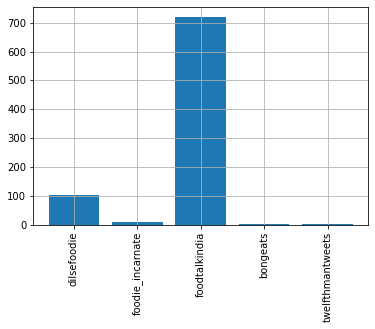

Enter Choice:15


In [19]:
handle_followers=[]
handles=[]
followers=[]
df=pd.DataFrame()
while(1):
    try:
        driver.refresh()
        choice=int(input("Enter Choice:"))
        if choice==0:
            user=input("Enter Username:")
            pwd=input("Enter Password:")
            login(user,pwd)
        elif choice==1:
            query=input("Enter Keyword:")
            search(query)
        elif choice==2:
            name=input("Enter Profile Name:")
            openProf(name)
        elif choice==3:
            follow()
        elif choice==4:
            unfollow()
        elif choice==5:
            num=int(input("Enter number of posts to like:"))
            like(num)
        elif choice==6:
            num=int(input("Enter number of posts to unlike:"))
            unlike(num)
        elif choice==7:
            n=int(input("Enter number of followers to extract:"))
            handle=input("Enter Profile Name:")
            handle_followers=followers(handle,n)
        elif choice==8:
            n=int(input("Enter number of followers and following to extract:"))
            own(handle_followers,n)#issue
        elif choice==9:
            story()
        elif choice==10:
            n=input("Enter comment:")
            comment(n)
        elif choice==11:
            n=input("Enter Keyword:")
            handles=most_popular1(n)
            followers,handles=most_popular2(handles)
            print(handles)
        elif choice==12:
            handles=['foodkaseries', 'dilsefoodie', 'foodie_incarnate', 'foodtalkindia', 'bongeats']
            df=word_list(handles)
        elif choice==13:
            #handles=['dilsefoodie', 'foodie_incarnate', 'foodtalkindia', 'bongeats', 'twelfthmantweets']
            #followers=[1004175.0, 1287715.0, 308511.0, 3117.0, 82748.0, 309277.0]
            follower_like(handles,followers)
        elif choice==14:
            home()
        elif choice==15: 
            break
    except:
        pass